#Extracting CSV files

In [1]:
import os
import shutil
import pandas as pd

# Load Excel file
excel_file = pd.ExcelFile('/content/grocery_database.xlsx')
output_directory = 'csv_files'

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Iterate over each sheet and convert to CSV
for sheet_name in excel_file.sheet_names:
    # Read each sheet
    df = pd.read_excel(excel_file, sheet_name)

    # Convert to CSV
    csv_filename = f'{output_directory}/{sheet_name}.csv'
    df.to_csv(csv_filename, index=False)

#Loading CSV files

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1=pd.read_csv('/content/csv_files/campaign_data.csv')
df2=pd.read_csv('/content/csv_files/customer_details.csv')
df3=pd.read_csv('/content/csv_files/loyalty_scores.csv')
df4=pd.read_csv('/content/csv_files/product_areas.csv')
df5=pd.read_csv('/content/csv_files/transactions.csv')

#Dealing with missing values

In [4]:
df1

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1
...,...,...,...,...,...
865,372,delivery_club,2020-07-01,Mailer2,1
866,104,delivery_club,2020-07-01,Mailer1,1
867,393,delivery_club,2020-07-01,Mailer2,1
868,373,delivery_club,2020-07-01,Control,0


In [5]:
df1.isnull().sum()

customer_id      0
campaign_name    0
campaign_date    0
mailer_type      0
signup_flag      0
dtype: int64

In [6]:
df2

,customer_id,distance_from_store,gender,credit_score
0,74,3.38,F,0.59
1,524,4.76,F,0.52
2,607,4.45,F,0.49
3,343,0.91,M,0.54
4,322,3.02,F,0.63
...,...,...,...,...
865,372,4.38,F,0.50
866,104,2.36,F,0.63
867,393,1.87,M,0.59
868,373,0.21,M,0.47


In [7]:
df2.isnull().sum()

customer_id            0
distance_from_store    5
gender                 5
credit_score           8
dtype: int64

In [8]:
# Mode imputation for gender
mode_gender = df2['gender'].mode()[0]
df2['gender'].fillna(mode_gender, inplace=True)

In [9]:
# Mean imputation for credit_score
mean_distance_from_store = df2['distance_from_store'].mean()
df2['distance_from_store'].fillna(mean_distance_from_store, inplace=True)

In [10]:
# Mean imputation for credit_score
mean_credit_score = df2['credit_score'].mean()
df2['credit_score'].fillna(mean_credit_score, inplace=True)

In [11]:
df2.isnull().sum()

customer_id            0
distance_from_store    0
gender                 0
credit_score           0
dtype: int64

In [12]:
df3

,customer_id,customer_loyalty_score
0,104,0.587
1,69,0.156
2,525,0.959
3,181,0.418
4,796,0.570
...,...,...
395,705,0.637
396,864,0.657
397,346,0.410
398,511,0.687


In [13]:
df3.isnull().sum()

customer_id               0
customer_loyalty_score    0
dtype: int64

In [14]:
df4

,product_area_id,product_area_name,profit_margin
0,1,Non-Food,0.25
1,2,Vegetables,0.18
2,3,Fruit,0.14
3,4,Dairy,0.19
4,5,Meat,0.11


In [15]:
df5

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16
1,1,2020-04-10,435657533999,2,5,7.71
2,1,2020-06-02,436189770685,4,4,26.97
3,1,2020-06-02,436189770685,1,2,38.52
4,1,2020-06-10,436265380298,4,4,22.13
...,...,...,...,...,...,...
38501,870,2020-09-23,437316479610,5,4,51.61
38502,870,2020-09-23,437316479610,2,15,33.77
38503,870,2020-09-30,437385547544,5,3,23.46
38504,870,2020-09-30,437385547544,1,1,18.52


In [16]:
df5.isnull().sum()

customer_id         0
transaction_date    0
transaction_id      0
product_area_id     0
num_items           0
sales_cost          0
dtype: int64

#Demographic Insights

In [17]:
result1 = pd.merge(df1, df2, on='customer_id', how='left')

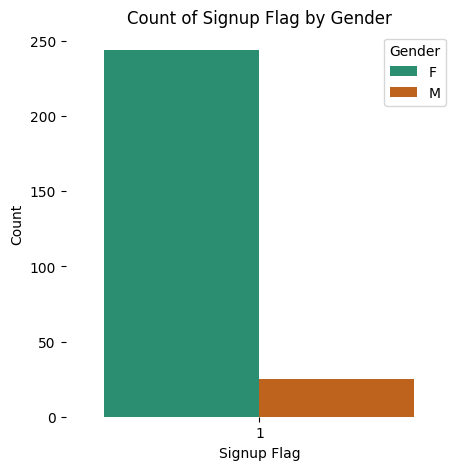

In [30]:
gender = result1[result1["signup_flag"] != 0]

import seaborn as sns
import matplotlib.pyplot as plt

figsize = (5, 5)
plt.figure(figsize=figsize)
sns.countplot(data=gender, x='signup_flag', hue='gender', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Count of Signup Flag by Gender')
plt.xlabel('Signup Flag')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


The female category exhibits a significantly higher sign-up count than male category.

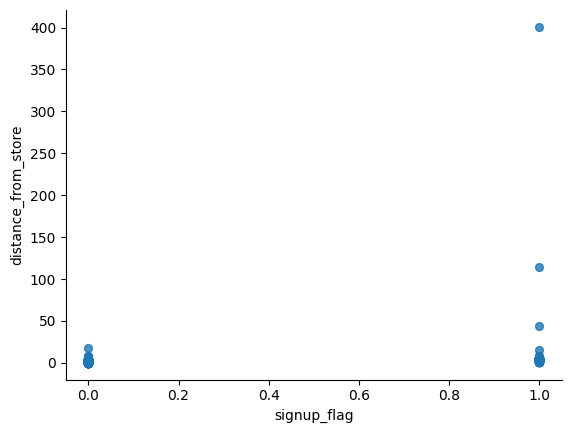

In [21]:
from matplotlib import pyplot as plt
result1.plot(kind='scatter', x='signup_flag', y='distance_from_store', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Customers very close to the store tend to sign up and not sign up in similar numbers.

There are customers who signed up even at very large distances from the store, suggesting that distance might not be a major deterrent for sign-up in some cases.

The plot shows some significant outliers with very high distances who have signed up, indicating that there are other factors besides distance influencing the decision to sign up.

#Product Area Insights

In [32]:
result2 = pd.merge(result1, df5, on='customer_id', how='left')

In [33]:
result2 = pd.merge(result2, df4, on='product_area_id', how='left')

In [37]:
popular_product_areas = result2.groupby('product_area_name')['num_items'].sum().reset_index()
popular_product_areas = popular_product_areas.sort_values(by='num_items', ascending=False)

In [40]:
print("Most Popular Product Areas\n",popular_product_areas)

Most Popular Product Areas
   product_area_name  num_items
1             Fruit      81476
4        Vegetables      65458
3          Non-Food      34396
0             Dairy      33903
2              Meat      23145


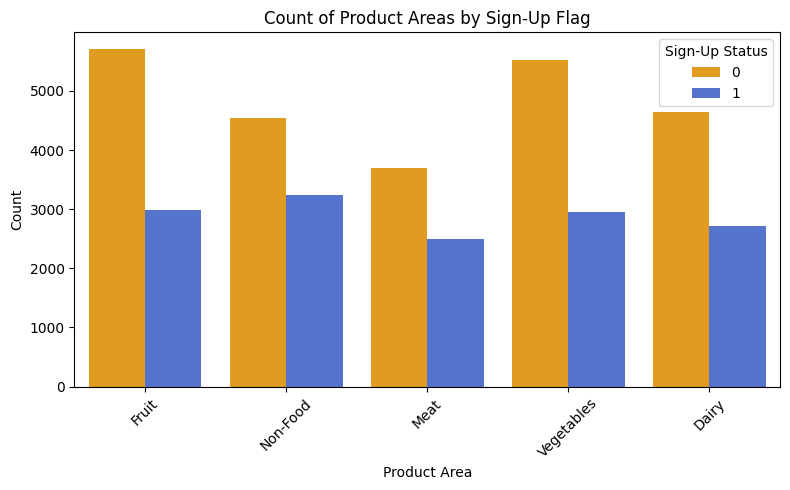

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(data=result2, x='product_area_name', hue='signup_flag', palette=['#FFA500', '#4169E1'])
plt.title('Count of Product Areas by Sign-Up Flag')
plt.xlabel('Product Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sign-Up Status')

plt.tight_layout()
plt.show()

Across all product areas, there are consistently more customers who did not sign up compared to those who did.

The disparity is most pronounced in the Vegetables and Fruit categories, suggesting these areas might have a larger base of non-sign-up customers.

The Meat category has the lowest counts overall but still follows the same pattern of non-sign-ups outnumbering sign-ups.

#Filtering and Summarising data

In [54]:
campaign_data = df1[df1["mailer_type"] != "Control"]

In [55]:
observed_values = pd.crosstab(campaign_data["mailer_type"], campaign_data["signup_flag"]).values

mailer1_signup_rate = 123 / (252 + 123)
mailer2_signup_rate = 127 / (209 + 127)

In [56]:
print(mailer1_signup_rate, mailer2_signup_rate)

0.328 0.37797619047619047


These rates suggest that the more expensive and colorful Mailer 2 has a higher signup rate compared to the basic and cheaper Mailer 1. However, to conclude if this difference is statistically significant, we would need to perform a statistical test such as a chi-squared test for proportions.

#Chi Square Test

In [59]:
from scipy.stats import chi2_contingency

acceptance_criteria = 0.05

chi2, p_value, dof, expected_value = chi2_contingency(observed_values, correction=False)

print(f"Chi-square statistic = {chi2}")
print(f"p-value = {p_value}")
print(f"Degrees of freedom = {dof}")

Chi-square statistic = 1.9414468614812481
p-value = 0.16351152223398197
Degrees of freedom = 1


In [60]:
# Interpret the results
if p_value > acceptance_criteria:
    print("There is no relationship between mailer type and signup rate.They are independent.")
else:
    print("There is a relationship between mailer type and signup rate.They are not independent.")

There is no relationship between mailer type and signup rate.They are independent.


Given that the signup rates are not significantly different, evaluate the costs associated with each mailer. If Mailer 2 is substantially more expensive, it might not be worth the additional cost given the lack of significant difference in signup rates.